In [1]:
#pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = "2012-01-01"
end= "2022-12-21"
stock= "GOOG"
data= yf.download(stock,start,end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.495003,16.562926,16.171750,16.185882,147611217
1,2012-01-04,16.566147,16.614982,16.376262,16.485582,114989399
2,2012-01-05,16.336349,16.459304,16.267435,16.413692,131808205
3,2012-01-06,16.113497,16.360893,16.107794,16.339821,108119746
4,2012-01-09,15.430305,16.038633,15.399813,16.026237,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.860695,96.761695,93.497158,95.089614,26452900
2757,2022-12-15,90.770073,93.586734,90.003706,93.099046,28298800
2758,2022-12-16,90.431679,91.317483,89.585687,90.770072,48485500


In [6]:
ma_100_days = data.Close.rolling(100).mean()

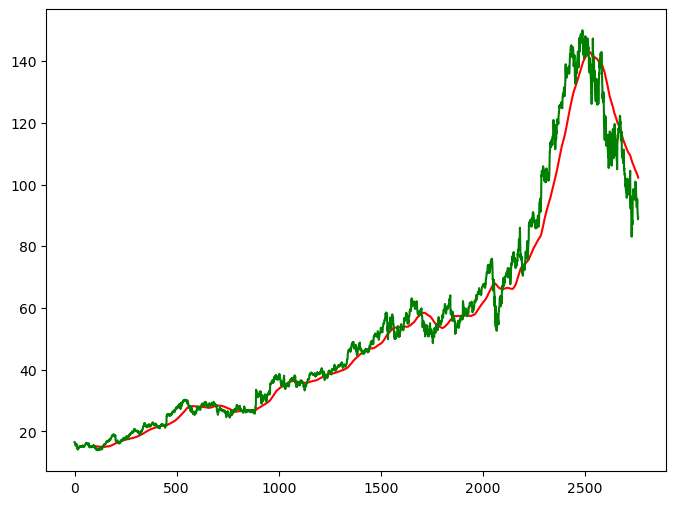

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [8]:
ma_200_days= data.Close.rolling(200).mean()

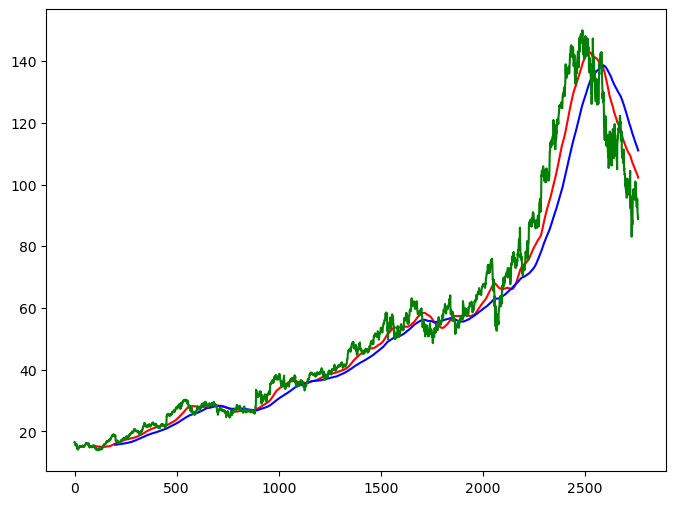

In [9]:
plt.figure(figsize =(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [12]:
data_train.shape[0]

2208

In [13]:
data_test.shape[0]

553

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))

In [15]:
data_train_scale=scaler.fit_transform(data_train)

In [16]:
x=[]
y=[]
for i in range (100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    
    

In [17]:
x,y = np.array(x),np.array(y)

In [18]:
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential


In [19]:
model= Sequential()
model.add(LSTM(units = 50,activation = 'relu',return_sequences=True,
               input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
             
model.add(LSTM(units = 80,activation ='relu',return_sequences = True))
model.add(Dropout(0.4))
                      
model.add(LSTM(units = 120,activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\Mike\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer='adam',loss= 'mean_squared_error')

In [21]:
model.fit(x,y,epochs = 50, batch_size=32,verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 143ms/step - loss: 0.0602
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - loss: 0.0070
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - loss: 0.0070
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - loss: 0.0061
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - loss: 0.0050
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - loss: 0.0044
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - loss: 0.0043
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - loss: 0.0041
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - loss: 0.0039
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - loss: 0.0044
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - loss: 0.0040
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - loss: 0.0038
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - loss: 0.0039
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step - loss: 0.0034
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [23]:
pas_100_days= data_train.tail(100)


In [24]:
data_test = pd.concat([pas_100_days,data_test],ignore_index =True)

In [25]:
data_test

Ticker,GOOG
0,70.004425
1,69.809349
2,70.188553
3,70.516991
4,70.557800
...,...
648,94.860695
649,90.770073
650,90.431679
651,88.729744


In [26]:
data_test_scale = scaler.fit_transform(data_test)


In [27]:
x=[]
y=[]
for i in range (100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
    
x,y = np.array(x),np.array(y)

In [28]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step


In [29]:
y_predict

array([[0.16115718],
       [0.16181532],
       [0.16349642],
       [0.16621481],
       [0.1698138 ],
       [0.17407848],
       [0.17864145],
       [0.18320772],
       [0.18765098],
       [0.19197191],
       [0.19630763],
       [0.20059279],
       [0.20475349],
       [0.20848522],
       [0.21161999],
       [0.21423742],
       [0.21650346],
       [0.21864708],
       [0.22109643],
       [0.2242167 ],
       [0.22820249],
       [0.23300992],
       [0.23837763],
       [0.24406675],
       [0.24982852],
       [0.25542742],
       [0.26074073],
       [0.2656514 ],
       [0.2701835 ],
       [0.27430236],
       [0.27790034],
       [0.28081742],
       [0.2830115 ],
       [0.28454515],
       [0.2855976 ],
       [0.2862872 ],
       [0.28680596],
       [0.28739578],
       [0.28828424],
       [0.28959066],
       [0.29131094],
       [0.29340369],
       [0.29567134],
       [0.29784283],
       [0.29972273],
       [0.30115375],
       [0.30205178],
       [0.302

In [30]:
scale=1/scaler.scale_

In [31]:
y_predict=y_predict*scale

In [32]:
y= y*scale

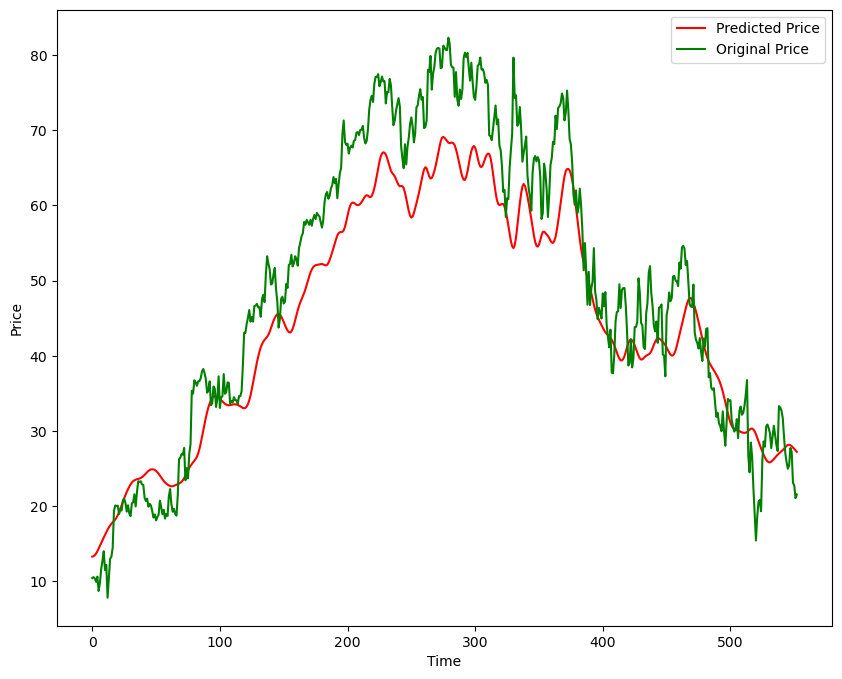

In [33]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label= "Predicted Price")
plt.plot(y, 'g',label="Original Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [35]:
model.save("StockPredictionModel.keras")